# Chapter 3: Logistic Regression

- This Jupyter Notebook is a supplement for the [Machine Learning Simplified](themlsbook.com) book. Note that all detailed explanations are written in the book. This notebook just shed light on Python implementations of the topics discussed.
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my notebooks. 

In [1049]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp
import pandas as pd
from sklearn.linear_model import LinearRegression #import Linear Regression model

In [1327]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(coef, theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta) + coef

def probability(coef, theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(coef, theta, x))



# 1. Data & Variables

Firstly, let's generate the sample data for X and y, identical to what we have in the MLS book.

In [1373]:
# Create a hypothetical dataset from the MLS book
data = {'m_sq': [15, 
                 21,
                 23,
                 50, 
                 35, 
                 37, 
                 45, 
                 66, 
                 84,
                 102], 
        'type': ['Studio', 
                     'Studio', 
                     'Studio', 
                     'Studio', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment',
                     'Apartment', 
                     'Apartment',
                     'Apartment']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df


,m_sq,type
0,15,Studio
1,21,Studio
2,23,Studio
3,50,Studio
4,35,Apartment
5,37,Apartment
6,45,Apartment
7,66,Apartment
8,84,Apartment
9,102,Apartment


In [1374]:
X = df.m_sq
Y = df.type
Y_encoded = [0,0,0,0,1,1,1,1,1,1]

In [1376]:
# ### temp 

reg = LinearRegression() #define the model
__x=np.array(X).reshape((-1, 1)) #reshape x
reg = LinearRegression().fit(__x, Y_encoded) #train your model with x-values

print(f'coefficient: {reg.coef_} \n intercept: {reg.intercept_}')

coefficient: [0.01128873] 
 intercept: 0.0603988134475939


In [1379]:
reg.intercept_

0.0603988134475939

Text(0, 0.5, 'Probability')

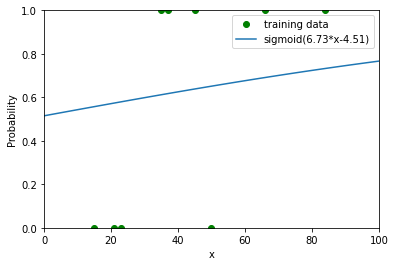

In [1386]:
_x = np.linspace(0,100,100)
y = probability(reg.intercept_, reg.coef_[0], _x)
# y = probability(-3.8, 0.1, _x)

plt.plot(X, Y_encoded, 'o', color='g', label='training data')
plt.plot(_x, 
         y, 
         label=f'sigmoid(6.73*x-4.51)')

plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 100) #length of x-axis
plt.xlabel('x')
plt.ylabel('Probability')

In [1362]:
# Create a hypothetical dataset from the MLS book
data = {'trial_score': [0.75, 
                 0.66,
                 0.71,
                 0.83, 
                 0.77, 
                 0.74], 
        'exam': ['No Pass', 
                     'No Pass', 
                     'No Pass', 
                     'Pass', 
                     'Pass', 
                     'Pass']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df


,trial_score,exam
0,0.75,No Pass
1,0.66,No Pass
2,0.71,No Pass
3,0.83,Pass
4,0.77,Pass
5,0.74,Pass


In [1363]:
X = df.trial_score
Y = df.exam
# Y_encoded = [0,0,0,0,1,1,1,1,1,1]

Y_encoded = [0,0,0,1,1,1]

In [1364]:
# ### temp 

reg = LinearRegression() #define the model
__x=np.array(X).reshape((-1, 1)) #reshape x
reg = LinearRegression().fit(__x, Y_encoded) #train your model with x-values

print(f'coefficient: {reg.coef_} \n intercept: {reg.intercept_}')

coefficient: [6.73469388] 
 intercept: -4.506122448979594


(0.0, 1.0)

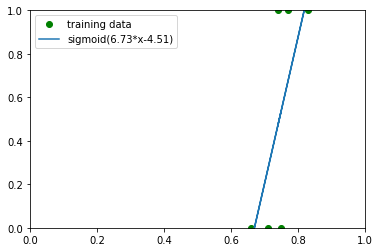

In [1365]:
fig, ax = plt.subplots() #define the graph
ax.plot(X, Y_encoded, 'o', color='g', label='training data')
ax.plot(X, 6.73*X-4.51, label=f'sigmoid(6.73*x-4.51)') 

plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 1) #length of x-axis

# cal=-3.82295799+0.10343942*i
#     outcome = 1 / (1 + np.exp(-cal))

Text(0, 0.5, 'Probability')

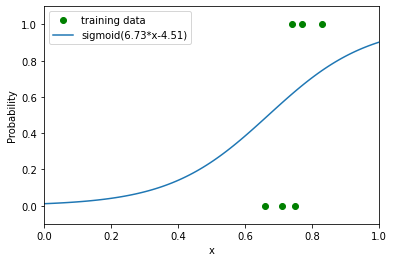

In [1366]:
_x = np.linspace(0,1,100)
# y = probability(-4.51, 6.73, _x)
y = probability(-4.51, 6.73, _x)
# y = probability(-3.8, 0.1, _x)

plt.plot(X, Y_encoded, 'o', color='g', label='training data')
plt.plot(_x, 
         y, 
         label=f'sigmoid(6.73*x-4.51)')

plt.legend(); #show legend
plt.ylim(-.1, 1.1) #length of y-axis
plt.xlim(0, 1) #length of x-axis
plt.xlabel('x')
plt.ylabel('Probability')


## Best fit Logistic Regression

In [1368]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

X=df.trial_score.values.reshape((-1, 1))
clf.fit(X, Y_encoded)


LogisticRegression()

In [1369]:
clf.intercept_

array([-0.0814422])

In [1370]:
clf.coef_

array([[0.10955268]])

Text(0, 0.5, 'Probability')

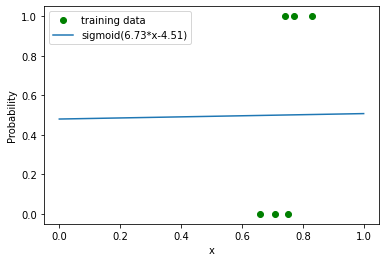

In [1372]:
_x = np.linspace(0,1,100)
y = probability(-0.08, 0.11, _x)


plt.plot(X, Y_encoded, 'o', color='g', label='training data')
plt.plot(_x, 
         y, 
         label=f'sigmoid(6.73*x-4.51)')

plt.legend(); #show legend
# plt.ylim(-.1, 1.1) #length of y-axis
# plt.xlim(0, 1) #length of x-axis
plt.xlabel('x')
plt.ylabel('Probability')


(0.0, 110.0)

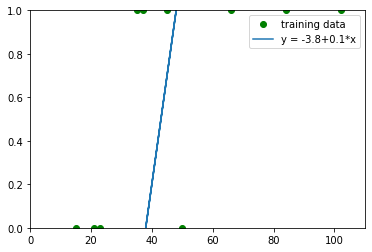

In [478]:
fig, ax = plt.subplots() #define the graph
ax.plot(X, y_encoded, 'o', color='g', label='training data')
ax.plot(X, -3.8+0.1*X, label=f'y = -3.8+0.1*x') 

plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis

# cal=-3.82295799+0.10343942*i
#     outcome = 1 / (1 + np.exp(-cal))

Text(0, 0.5, 'Probability')

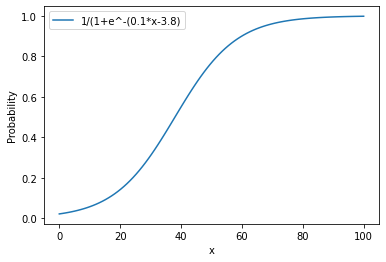

In [373]:
_x = np.linspace(0,100,100)
y = probability(-3.8, 0.1, _x)
# y = probability(0.06, 0.02, x)

plt.plot(_x, 
         y, 
         label=f'1/(1+e^-(0.1*x-3.8)')

plt.legend(); #show legend
plt.xlabel('x')
plt.ylabel('Probability')

In [394]:
#building loss function

In [435]:
def calc_mle(_coef):
    l = []
    L=1
    X_predict=[]
    # _coef = 0.15

    for i in X:
        x=_coef*i-3.8
        X_predict.append(1 / (1 + np.exp(-x)))


    for i in range(0, len(df)):
        if Y_encoded[i]==0:
            _l = 1-X_predict[i]
            print(round(_l, 3))
            l.append(round(_l, 3))
        elif Y_encoded[i]==1:
            l.append(round(X_predict[i], 3))
            print(round(X_predict[i], 3))
        L = L*l[i]
    return L

In [433]:
def calc_mle_inter(_inter):
    l = []
    L=1
    X_predict=[]
    # _coef = 0.15
#     _inter=-3.8
    for i in X:
        x=0.1*i+_inter
        X_predict.append(1 / (1 + np.exp(-x)))


    for i in range(0, len(df)):
        if Y_encoded[i]==0:
            _l = 1-X_predict[i]
            l.append(round(_l, 3))
        elif Y_encoded[i]==1:
            l.append(round(X_predict[i], 3))
        L = L*l[i]
    return L

# Different logits

Text(0, 0.5, 'Probability')

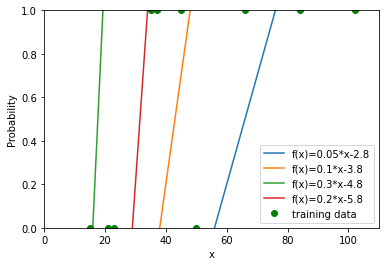

In [518]:
fig, ax = plt.subplots() #define the graph

_x = np.linspace(0,100,100)


y = 0.05*_x-2.8
plt.plot(_x, y, label=f'f(x)=0.05*x-2.8')

y = 0.1*_x-3.8
plt.plot(_x, y, label=f'f(x)=0.1*x-3.8')

y = 0.3*_x-4.8
plt.plot(_x, y, label=f'f(x)=0.3*x-4.8')

y = 0.2*_x-5.8
plt.plot(_x, y, label=f'f(x)=0.2*x-5.8')


ax.plot(X, y_encoded, 'o', color='g', label='training data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis
plt.xlabel('x')
plt.ylabel('Probability')

> Logistic regression

Text(0, 0.5, 'Probability')

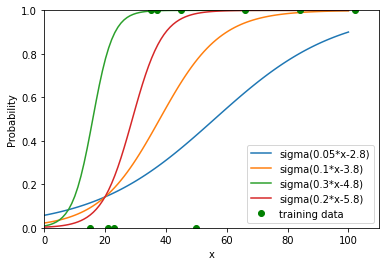

In [519]:
fig, ax = plt.subplots() #define the graph

_x = np.linspace(0,100,100)
# _x = X


y = probability(-2.8, 0.05, _x)
plt.plot(_x, y, label=f'sigma(0.05*x-2.8)')

y = probability(-3.8, 0.1, _x)
plt.plot(_x, y, label=f'sigma(0.1*x-3.8)')

y = probability(-4.8, 0.3, _x)
plt.plot(_x, y, label=f'sigma(0.3*x-4.8)')

y = probability(-5.8, 0.2, _x)
plt.plot(_x, y, label=f'sigma(0.2*x-5.8)')


ax.plot(X, y_encoded, 'o', color='g', label='training data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis
plt.xlabel('x')
plt.ylabel('Probability')

## Varying a

Text(0, 0.5, 'Probability')

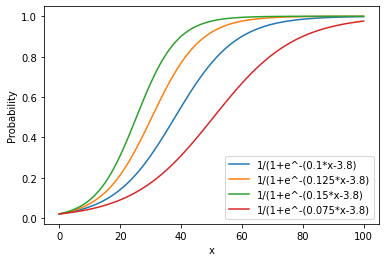

In [534]:
_x = np.linspace(0,100,100)
y = probability(-3.8, 0.1, _x)
plt.plot(_x, y, label=f'1/(1+e^-(0.1*x-3.8)')

y = probability(-3.8, 0.125, _x)
plt.plot(_x, y, label=f'1/(1+e^-(0.125*x-3.8)')

y = probability(-3.8, 0.15, _x)
plt.plot(_x, y, label=f'1/(1+e^-(0.15*x-3.8)')

y = probability(-3.8, 0.075, _x)
plt.plot(_x, y, label=f'1/(1+e^-(0.075*x-3.8)')

plt.legend(); #show legend
plt.xlabel('x')
plt.ylabel('Probability')

# MLE FUnction

In [428]:
# coef = [-0.3, -0.25, -0.20, -0.15, -0.1, -0.5, 0, 0.5, 0.1, 0.15, 0.2, 0.25, 0.3]
coef = np.linspace(-0.3,0.3,100)
L = []

for i in coef:
    L.append(calc_mle(i))

(0.0, 0.2)

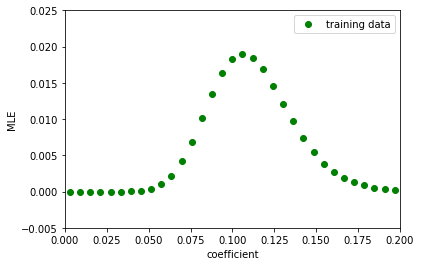

In [432]:
fig, ax = plt.subplots() #define the graph
ax.plot(coef, L, 'o', color='g', label='training data')
# ax.plot(X, -3.8+0.1*X, label=f'y = -3.8+0.1*x') 

plt.legend(); #show legend
plt.xlabel('coefficient')
plt.ylabel('MLE')
plt.ylim(-0.005, 0.025) #length of y-axis
plt.xlim(0, 0.2) #length of x-axis

# cal=-3.82295799+0.10343942*i
#     outcome = 1 / (1 + np.exp(-cal))

In [416]:
# inter = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
# L = []

# for i in inter:
#     L.append(calc_mle_inter(i))

Text(0, 0.5, 'MLE')

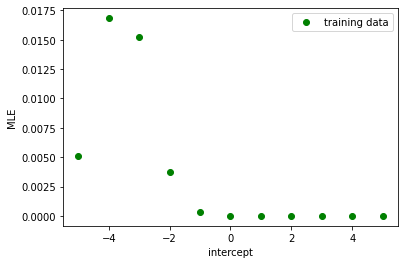

In [418]:
# fig, ax = plt.subplots() #define the graph
# ax.plot(inter, L, 'o', color='g', label='training data')
# # ax.plot(X, -3.8+0.1*X, label=f'y = -3.8+0.1*x') 

# plt.legend(); #show legend
# plt.xlabel('intercept')
# plt.ylabel('MLE')
# # plt.ylim(0, 1) #length of y-axis
# # plt.xlim(0, 110) #length of x-axis

# # cal=-3.82295799+0.10343942*i
# #     outcome = 1 / (1 + np.exp(-cal))

# Gradient Descent

In [540]:
from sympy import *
In [2]: import numpy as np
In [3]: x = Symbol('x')
In [4]: y = x**2 + 1
In [5]: yprime = y.diff(x)
In [6]: yprime
Out[6]: 2⋅x

In [7]: f = lambdify(x, yprime, 'numpy')
In [8]: f(np.ones(5))
Out[8]: [ 2.  2.  2.  2.  2.]

In [565]:
from sympy import *

In [605]:
a = Symbol('a')

In [1008]:
mle = (1-(1/(1+exp(-(a*15-3.8)))))*(1-(1/(1+exp(-(a*21-3.8)))))*(1-(1/(1+exp(-(a*23-3.8)))))*(1-(1/(1+exp(-(a*50-3.8)))))*(1/(1+exp(-(a*35-3.8))))*(1/(1+exp(-(a*37-3.8))))*(1/(1+exp(-(a*45-3.8))))*(1/(1+exp(-(a*66-3.8))))*(1/(1+exp(-(a*84-3.8))))*(1/(1+exp(-(a*102-3.8))))





In [1009]:
a = Symbol('a')
mle = -(1-(1/(1+exp(-(a*15-3.8)))))*(1-(1/(1+exp(-(a*21-3.8)))))*(1-(1/(1+exp(-(a*23-3.8)))))*(1-(1/(1+exp(-(a*50-3.8)))))*(1/(1+exp(-(a*35-3.8))))*(1/(1+exp(-(a*37-3.8))))*(1/(1+exp(-(a*45-3.8))))*(1/(1+exp(-(a*66-3.8))))*(1/(1+exp(-(a*84-3.8))))*(1/(1+exp(-(a*102-3.8))))
yprime = diff(mle) # get derivative

# print(yprime) # print derivative


# First iteration

In [1032]:
_a = 0  #coefficient is not known and randomly assigned to be 0
l=0.1 #learning rate is defined to be 0.001

In [1033]:
#substitute a with 0
d = yprime.subs(a, _a)
d

-3.60196996392252e-8

In [1034]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60196996392252e-9


And then we update $a$: 
\begin{equation}
    \begin{split}
        a_{new} &= a - Step \ Size \\
        &=0-(-0.972)=0.972
    \end{split}
\end{equation}


In [1035]:
_a = _a-step_size
print('At Step 1, a = ', _a)

At Step 1, a =  3.60196996392252e-9


# Second

In [1036]:
#substitute a with 0
d = yprime.subs(a,_a)
d

-3.60197459236562e-8

In [1037]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60197459236562e-9


In [1038]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  7.20394455628814e-9


# Third

In [1039]:
#substitute a with 0
d = yprime.subs(a,_a)
d

-3.60197922082059e-8

In [1040]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60197922082059e-9


In [1041]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  1.08059237771087e-8


# Fourth

In [1042]:
#substitute a with 0
d = yprime.subs(a,_a)
d

-3.60198384928741e-8

In [1043]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60198384928741e-9


In [1044]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  1.44079076263961e-8


# 5

In [1045]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  1.80098914756835e-8


In [1046]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60198384928741e-9


In [1047]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  2.16118753249709e-8


# 6

In [1026]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  2.52137966901198e-9


In [1027]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60197135245501e-10


In [1028]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  2.88157680425748e-9


# 7

In [1029]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  3.24177393950299e-9


In [1030]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  -3.60197135245501e-10


In [1031]:
_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  3.60197107474849e-9


# 8

In [969]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0621355812501448
Step Size =  -0.000196075446047692
At Step 2, a =  0.0623316566961925


# 9

In [970]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0625277321422402
Step Size =  -0.000196075446047692
At Step 2, a =  0.0627238075882878


In [971]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0629198830343355
Step Size =  -0.000196075446047692
At Step 2, a =  0.0631159584803832


In [972]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0633120339264309
Step Size =  -0.000196075446047692
At Step 2, a =  0.0635081093724786


In [973]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0637041848185263
Step Size =  -0.000196075446047692
At Step 2, a =  0.0639002602645740


In [974]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0640963357106217
Step Size =  -0.000196075446047692
At Step 2, a =  0.0642924111566694


In [975]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0644884866027170
Step Size =  -0.000196075446047692
At Step 2, a =  0.0646845620487647


In [976]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0648806374948124
Step Size =  -0.000196075446047692
At Step 2, a =  0.0650767129408601


In [977]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0652727883869078
Step Size =  -0.000196075446047692
At Step 2, a =  0.0654688638329555


In [978]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0656649392790032
Step Size =  -0.000196075446047692
At Step 2, a =  0.0658610147250509


In [979]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0660570901710986
Step Size =  -0.000196075446047692
At Step 2, a =  0.0662531656171462


In [980]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0664492410631939
Step Size =  -0.000196075446047692
At Step 2, a =  0.0666453165092416


In [981]:
_a = _a-step_size
print('At Step 2, a = ', _a)

step_size = d*l
print('Step Size = ', step_size)

_a = _a-step_size
print('At Step 2, a = ', _a)

At Step 2, a =  0.0668413919552893
Step Size =  -0.000196075446047692
At Step 2, a =  0.0670374674013370


In [982]:
a = 50
while i<50:
    _a = _a-step_size
    print('At Step 2, a = ', _a)

    step_size = d*l
    print('Step Size = ', step_size)

    _a = _a-step_size
    print('At Step 2, a = ', _a)

At Step 2, a =  0.0672335428473847
Step Size =  -0.000196075446047692
At Step 2, a =  0.0674296182934324
At Step 2, a =  0.0676256937394801
Step Size =  -0.000196075446047692
At Step 2, a =  0.0678217691855277
At Step 2, a =  0.0680178446315754
Step Size =  -0.000196075446047692
At Step 2, a =  0.0682139200776231
At Step 2, a =  0.0684099955236708
Step Size =  -0.000196075446047692
At Step 2, a =  0.0686060709697185
At Step 2, a =  0.0688021464157662
Step Size =  -0.000196075446047692
At Step 2, a =  0.0689982218618139
At Step 2, a =  0.0691942973078616
Step Size =  -0.000196075446047692
At Step 2, a =  0.0693903727539093
At Step 2, a =  0.0695864481999569
Step Size =  -0.000196075446047692
At Step 2, a =  0.0697825236460046
At Step 2, a =  0.0699785990920523
Step Size =  -0.000196075446047692
At Step 2, a =  0.0701746745381000
At Step 2, a =  0.0703707499841477
Step Size =  -0.000196075446047692
At Step 2, a =  0.0705668254301954
At Step 2, a =  0.0707629008762431
Step Size =  -0.0001

At Step 2, a =  0.177820094418281
Step Size =  -0.000196075446047692
At Step 2, a =  0.178016169864329
At Step 2, a =  0.178212245310377
Step Size =  -0.000196075446047692
At Step 2, a =  0.178408320756424
At Step 2, a =  0.178604396202472
Step Size =  -0.000196075446047692
At Step 2, a =  0.178800471648520
At Step 2, a =  0.178996547094567
Step Size =  -0.000196075446047692
At Step 2, a =  0.179192622540615
At Step 2, a =  0.179388697986663
Step Size =  -0.000196075446047692
At Step 2, a =  0.179584773432710
At Step 2, a =  0.179780848878758
Step Size =  -0.000196075446047692
At Step 2, a =  0.179976924324806
At Step 2, a =  0.180172999770853
Step Size =  -0.000196075446047692
At Step 2, a =  0.180369075216901
At Step 2, a =  0.180565150662949
Step Size =  -0.000196075446047692
At Step 2, a =  0.180761226108997
At Step 2, a =  0.180957301555044
Step Size =  -0.000196075446047692
At Step 2, a =  0.181153377001092
At Step 2, a =  0.181349452447140
Step Size =  -0.000196075446047692
At S

At Step 2, a =  0.275857817442129
Step Size =  -0.000196075446047692
At Step 2, a =  0.276053892888177
At Step 2, a =  0.276249968334225
Step Size =  -0.000196075446047692
At Step 2, a =  0.276446043780272
At Step 2, a =  0.276642119226320
Step Size =  -0.000196075446047692
At Step 2, a =  0.276838194672368
At Step 2, a =  0.277034270118416
Step Size =  -0.000196075446047692
At Step 2, a =  0.277230345564463
At Step 2, a =  0.277426421010511
Step Size =  -0.000196075446047692
At Step 2, a =  0.277622496456559
At Step 2, a =  0.277818571902606
Step Size =  -0.000196075446047692
At Step 2, a =  0.278014647348654
At Step 2, a =  0.278210722794702
Step Size =  -0.000196075446047692
At Step 2, a =  0.278406798240750
At Step 2, a =  0.278602873686797
Step Size =  -0.000196075446047692
At Step 2, a =  0.278798949132845
At Step 2, a =  0.278995024578893
Step Size =  -0.000196075446047692
At Step 2, a =  0.279191100024940
At Step 2, a =  0.279387175470988
Step Size =  -0.000196075446047692
At S

At Step 2, a =  0.373699465019940
At Step 2, a =  0.373895540465987
Step Size =  -0.000196075446047692
At Step 2, a =  0.374091615912035
At Step 2, a =  0.374287691358083
Step Size =  -0.000196075446047692
At Step 2, a =  0.374483766804131
At Step 2, a =  0.374679842250178
Step Size =  -0.000196075446047692
At Step 2, a =  0.374875917696226
At Step 2, a =  0.375071993142274
Step Size =  -0.000196075446047692
At Step 2, a =  0.375268068588322
At Step 2, a =  0.375464144034369
Step Size =  -0.000196075446047692
At Step 2, a =  0.375660219480417
At Step 2, a =  0.375856294926465
Step Size =  -0.000196075446047692
At Step 2, a =  0.376052370372512
At Step 2, a =  0.376248445818560
Step Size =  -0.000196075446047692
At Step 2, a =  0.376444521264608
At Step 2, a =  0.376640596710656
Step Size =  -0.000196075446047692
At Step 2, a =  0.376836672156703
At Step 2, a =  0.377032747602751
Step Size =  -0.000196075446047692
At Step 2, a =  0.377228823048799
At Step 2, a =  0.377424898494846
Step 

At Step 2, a =  0.471737188043798
At Step 2, a =  0.471933263489846
Step Size =  -0.000196075446047692
At Step 2, a =  0.472129338935893
At Step 2, a =  0.472325414381941
Step Size =  -0.000196075446047692
At Step 2, a =  0.472521489827989
At Step 2, a =  0.472717565274037
Step Size =  -0.000196075446047692
At Step 2, a =  0.472913640720084
At Step 2, a =  0.473109716166132
Step Size =  -0.000196075446047692
At Step 2, a =  0.473305791612180
At Step 2, a =  0.473501867058227
Step Size =  -0.000196075446047692
At Step 2, a =  0.473697942504275
At Step 2, a =  0.473894017950323
Step Size =  -0.000196075446047692
At Step 2, a =  0.474090093396371
At Step 2, a =  0.474286168842418
Step Size =  -0.000196075446047692
At Step 2, a =  0.474482244288466
At Step 2, a =  0.474678319734514
Step Size =  -0.000196075446047692
At Step 2, a =  0.474874395180562
At Step 2, a =  0.475070470626609
Step Size =  -0.000196075446047692
At Step 2, a =  0.475266546072657
At Step 2, a =  0.475462621518705
Step 

At Step 2, a =  0.569774911067656
At Step 2, a =  0.569970986513704
Step Size =  -0.000196075446047692
At Step 2, a =  0.570167061959752
At Step 2, a =  0.570363137405799
Step Size =  -0.000196075446047692
At Step 2, a =  0.570559212851847
At Step 2, a =  0.570755288297895
Step Size =  -0.000196075446047692
At Step 2, a =  0.570951363743943
At Step 2, a =  0.571147439189990
Step Size =  -0.000196075446047692
At Step 2, a =  0.571343514636038
At Step 2, a =  0.571539590082086
Step Size =  -0.000196075446047692
At Step 2, a =  0.571735665528133
At Step 2, a =  0.571931740974181
Step Size =  -0.000196075446047692
At Step 2, a =  0.572127816420229
At Step 2, a =  0.572323891866277
Step Size =  -0.000196075446047692
At Step 2, a =  0.572519967312324
At Step 2, a =  0.572716042758372
Step Size =  -0.000196075446047692
At Step 2, a =  0.572912118204420
At Step 2, a =  0.573108193650468
Step Size =  -0.000196075446047692
At Step 2, a =  0.573304269096515
At Step 2, a =  0.573500344542563
Step 

At Step 2, a =  0.667812634091515
At Step 2, a =  0.668008709537562
Step Size =  -0.000196075446047692
At Step 2, a =  0.668204784983610
At Step 2, a =  0.668400860429658
Step Size =  -0.000196075446047692
At Step 2, a =  0.668596935875705
At Step 2, a =  0.668793011321753
Step Size =  -0.000196075446047692
At Step 2, a =  0.668989086767801
At Step 2, a =  0.669185162213849
Step Size =  -0.000196075446047692
At Step 2, a =  0.669381237659896
At Step 2, a =  0.669577313105944
Step Size =  -0.000196075446047692
At Step 2, a =  0.669773388551992
At Step 2, a =  0.669969463998039
Step Size =  -0.000196075446047692
At Step 2, a =  0.670165539444087
At Step 2, a =  0.670361614890135
Step Size =  -0.000196075446047692
At Step 2, a =  0.670557690336183
At Step 2, a =  0.670753765782230
Step Size =  -0.000196075446047692
At Step 2, a =  0.670949841228278
At Step 2, a =  0.671145916674326
Step Size =  -0.000196075446047692
At Step 2, a =  0.671341992120373
At Step 2, a =  0.671538067566421
Step 

Step Size =  -0.000196075446047692
At Step 2, a =  0.765850357115373
At Step 2, a =  0.766046432561421
Step Size =  -0.000196075446047692
At Step 2, a =  0.766242508007468
At Step 2, a =  0.766438583453516
Step Size =  -0.000196075446047692
At Step 2, a =  0.766634658899564
At Step 2, a =  0.766830734345611
Step Size =  -0.000196075446047692
At Step 2, a =  0.767026809791659
At Step 2, a =  0.767222885237707
Step Size =  -0.000196075446047692
At Step 2, a =  0.767418960683755
At Step 2, a =  0.767615036129802
Step Size =  -0.000196075446047692
At Step 2, a =  0.767811111575850
At Step 2, a =  0.768007187021898
Step Size =  -0.000196075446047692
At Step 2, a =  0.768203262467945
At Step 2, a =  0.768399337913993
Step Size =  -0.000196075446047692
At Step 2, a =  0.768595413360041
At Step 2, a =  0.768791488806089
Step Size =  -0.000196075446047692
At Step 2, a =  0.768987564252136
At Step 2, a =  0.769183639698184
Step Size =  -0.000196075446047692
At Step 2, a =  0.769379715144232
At S

Step Size =  -0.000196075446047692
At Step 2, a =  0.863888080139231
At Step 2, a =  0.864084155585279
Step Size =  -0.000196075446047692
At Step 2, a =  0.864280231031327
At Step 2, a =  0.864476306477374
Step Size =  -0.000196075446047692
At Step 2, a =  0.864672381923422
At Step 2, a =  0.864868457369470
Step Size =  -0.000196075446047692
At Step 2, a =  0.865064532815517
At Step 2, a =  0.865260608261565
Step Size =  -0.000196075446047692
At Step 2, a =  0.865456683707613
At Step 2, a =  0.865652759153661
Step Size =  -0.000196075446047692
At Step 2, a =  0.865848834599708
At Step 2, a =  0.866044910045756
Step Size =  -0.000196075446047692
At Step 2, a =  0.866240985491804
At Step 2, a =  0.866437060937851
Step Size =  -0.000196075446047692
At Step 2, a =  0.866633136383899
At Step 2, a =  0.866829211829947
Step Size =  -0.000196075446047692
At Step 2, a =  0.867025287275995
At Step 2, a =  0.867221362722042
Step Size =  -0.000196075446047692
At Step 2, a =  0.867417438168090
At S

Step Size =  -0.000196075446047692
At Step 2, a =  0.961925803163089
At Step 2, a =  0.962121878609137
Step Size =  -0.000196075446047692
At Step 2, a =  0.962317954055185
At Step 2, a =  0.962514029501233
Step Size =  -0.000196075446047692
At Step 2, a =  0.962710104947280
At Step 2, a =  0.962906180393328
Step Size =  -0.000196075446047692
At Step 2, a =  0.963102255839376
At Step 2, a =  0.963298331285423
Step Size =  -0.000196075446047692
At Step 2, a =  0.963494406731471
At Step 2, a =  0.963690482177519
Step Size =  -0.000196075446047692
At Step 2, a =  0.963886557623567
At Step 2, a =  0.964082633069614
Step Size =  -0.000196075446047692
At Step 2, a =  0.964278708515662
At Step 2, a =  0.964474783961710
Step Size =  -0.000196075446047692
At Step 2, a =  0.964670859407757
At Step 2, a =  0.964866934853805
Step Size =  -0.000196075446047692
At Step 2, a =  0.965063010299853
At Step 2, a =  0.965259085745901
Step Size =  -0.000196075446047692
At Step 2, a =  0.965455161191948
At S

Step Size =  -0.000196075446047692
At Step 2, a =  1.05996352618695
At Step 2, a =  1.06015960163300
Step Size =  -0.000196075446047692
At Step 2, a =  1.06035567707904
At Step 2, a =  1.06055175252509
Step Size =  -0.000196075446047692
At Step 2, a =  1.06074782797114
At Step 2, a =  1.06094390341719
Step Size =  -0.000196075446047692
At Step 2, a =  1.06113997886323
At Step 2, a =  1.06133605430928
Step Size =  -0.000196075446047692
At Step 2, a =  1.06153212975533
At Step 2, a =  1.06172820520138
Step Size =  -0.000196075446047692
At Step 2, a =  1.06192428064742
At Step 2, a =  1.06212035609347
Step Size =  -0.000196075446047692
At Step 2, a =  1.06231643153952
At Step 2, a =  1.06251250698557
Step Size =  -0.000196075446047692
At Step 2, a =  1.06270858243162
At Step 2, a =  1.06290465787766
Step Size =  -0.000196075446047692
At Step 2, a =  1.06310073332371
At Step 2, a =  1.06329680876976
Step Size =  -0.000196075446047692
At Step 2, a =  1.06349288421581
At Step 2, a =  1.06368

At Step 2, a =  1.15780517376476
Step Size =  -0.000196075446047692
At Step 2, a =  1.15800124921081
At Step 2, a =  1.15819732465685
Step Size =  -0.000196075446047692
At Step 2, a =  1.15839340010290
At Step 2, a =  1.15858947554895
Step Size =  -0.000196075446047692
At Step 2, a =  1.15878555099500
At Step 2, a =  1.15898162644104
Step Size =  -0.000196075446047692
At Step 2, a =  1.15917770188709
At Step 2, a =  1.15937377733314
Step Size =  -0.000196075446047692
At Step 2, a =  1.15956985277919
At Step 2, a =  1.15976592822524
Step Size =  -0.000196075446047692
At Step 2, a =  1.15996200367128
At Step 2, a =  1.16015807911733
Step Size =  -0.000196075446047692
At Step 2, a =  1.16035415456338
At Step 2, a =  1.16055023000943
Step Size =  -0.000196075446047692
At Step 2, a =  1.16074630545547
At Step 2, a =  1.16094238090152
Step Size =  -0.000196075446047692
At Step 2, a =  1.16113845634757
At Step 2, a =  1.16133453179362
Step Size =  -0.000196075446047692
At Step 2, a =  1.16153

At Step 2, a =  1.25584289678862
Step Size =  -0.000196075446047692
At Step 2, a =  1.25603897223466
At Step 2, a =  1.25623504768071
Step Size =  -0.000196075446047692
At Step 2, a =  1.25643112312676
At Step 2, a =  1.25662719857281
Step Size =  -0.000196075446047692
At Step 2, a =  1.25682327401885
At Step 2, a =  1.25701934946490
Step Size =  -0.000196075446047692
At Step 2, a =  1.25721542491095
At Step 2, a =  1.25741150035700
Step Size =  -0.000196075446047692
At Step 2, a =  1.25760757580305
At Step 2, a =  1.25780365124909
Step Size =  -0.000196075446047692
At Step 2, a =  1.25799972669514
At Step 2, a =  1.25819580214119
Step Size =  -0.000196075446047692
At Step 2, a =  1.25839187758724
At Step 2, a =  1.25858795303328
Step Size =  -0.000196075446047692
At Step 2, a =  1.25878402847933
At Step 2, a =  1.25898010392538
Step Size =  -0.000196075446047692
At Step 2, a =  1.25917617937143
At Step 2, a =  1.25937225481748
Step Size =  -0.000196075446047692
At Step 2, a =  1.25956

At Step 2, a =  1.35388061981247
Step Size =  -0.000196075446047692
At Step 2, a =  1.35407669525852
At Step 2, a =  1.35427277070457
Step Size =  -0.000196075446047692
At Step 2, a =  1.35446884615062
At Step 2, a =  1.35466492159667
Step Size =  -0.000196075446047692
At Step 2, a =  1.35486099704271
At Step 2, a =  1.35505707248876
Step Size =  -0.000196075446047692
At Step 2, a =  1.35525314793481
At Step 2, a =  1.35544922338086
Step Size =  -0.000196075446047692
At Step 2, a =  1.35564529882690
At Step 2, a =  1.35584137427295
Step Size =  -0.000196075446047692
At Step 2, a =  1.35603744971900
At Step 2, a =  1.35623352516505
Step Size =  -0.000196075446047692
At Step 2, a =  1.35642960061109
At Step 2, a =  1.35662567605714
Step Size =  -0.000196075446047692
At Step 2, a =  1.35682175150319
At Step 2, a =  1.35701782694924
Step Size =  -0.000196075446047692
At Step 2, a =  1.35721390239529
At Step 2, a =  1.35740997784133
Step Size =  -0.000196075446047692
At Step 2, a =  1.35760

At Step 2, a =  1.45191834283633
Step Size =  -0.000196075446047692
At Step 2, a =  1.45211441828238
At Step 2, a =  1.45231049372843
Step Size =  -0.000196075446047692
At Step 2, a =  1.45250656917448
At Step 2, a =  1.45270264462052
Step Size =  -0.000196075446047692
At Step 2, a =  1.45289872006657
At Step 2, a =  1.45309479551262
Step Size =  -0.000196075446047692
At Step 2, a =  1.45329087095867
At Step 2, a =  1.45348694640471
Step Size =  -0.000196075446047692
At Step 2, a =  1.45368302185076
At Step 2, a =  1.45387909729681
Step Size =  -0.000196075446047692
At Step 2, a =  1.45407517274286
At Step 2, a =  1.45427124818891
Step Size =  -0.000196075446047692
At Step 2, a =  1.45446732363495
At Step 2, a =  1.45466339908100
Step Size =  -0.000196075446047692
At Step 2, a =  1.45485947452705
At Step 2, a =  1.45505554997310
Step Size =  -0.000196075446047692
At Step 2, a =  1.45525162541914
At Step 2, a =  1.45544770086519
Step Size =  -0.000196075446047692
At Step 2, a =  1.45564

At Step 2, a =  1.54975999041414
At Step 2, a =  1.54995606586019
Step Size =  -0.000196075446047692
At Step 2, a =  1.55015214130624
At Step 2, a =  1.55034821675229
Step Size =  -0.000196075446047692
At Step 2, a =  1.55054429219833
At Step 2, a =  1.55074036764438
Step Size =  -0.000196075446047692
At Step 2, a =  1.55093644309043
At Step 2, a =  1.55113251853648
Step Size =  -0.000196075446047692
At Step 2, a =  1.55132859398253
At Step 2, a =  1.55152466942857
Step Size =  -0.000196075446047692
At Step 2, a =  1.55172074487462
At Step 2, a =  1.55191682032067
Step Size =  -0.000196075446047692
At Step 2, a =  1.55211289576672
At Step 2, a =  1.55230897121276
Step Size =  -0.000196075446047692
At Step 2, a =  1.55250504665881
At Step 2, a =  1.55270112210486
Step Size =  -0.000196075446047692
At Step 2, a =  1.55289719755091
At Step 2, a =  1.55309327299695
Step Size =  -0.000196075446047692
At Step 2, a =  1.55328934844300
At Step 2, a =  1.55348542388905
Step Size =  -0.000196075

At Step 2, a =  1.64779771343800
At Step 2, a =  1.64799378888405
Step Size =  -0.000196075446047692
At Step 2, a =  1.64818986433010
At Step 2, a =  1.64838593977614
Step Size =  -0.000196075446047692
At Step 2, a =  1.64858201522219
At Step 2, a =  1.64877809066824
Step Size =  -0.000196075446047692
At Step 2, a =  1.64897416611429
At Step 2, a =  1.64917024156034
Step Size =  -0.000196075446047692
At Step 2, a =  1.64936631700638
At Step 2, a =  1.64956239245243
Step Size =  -0.000196075446047692
At Step 2, a =  1.64975846789848
At Step 2, a =  1.64995454334453
Step Size =  -0.000196075446047692
At Step 2, a =  1.65015061879057
At Step 2, a =  1.65034669423662
Step Size =  -0.000196075446047692
At Step 2, a =  1.65054276968267
At Step 2, a =  1.65073884512872
Step Size =  -0.000196075446047692
At Step 2, a =  1.65093492057477
At Step 2, a =  1.65113099602081
Step Size =  -0.000196075446047692
At Step 2, a =  1.65132707146686
At Step 2, a =  1.65152314691291
Step Size =  -0.000196075

At Step 2, a =  1.74583543646186
At Step 2, a =  1.74603151190791
Step Size =  -0.000196075446047692
At Step 2, a =  1.74622758735396
At Step 2, a =  1.74642366280000
Step Size =  -0.000196075446047692
At Step 2, a =  1.74661973824605
At Step 2, a =  1.74681581369210
Step Size =  -0.000196075446047692
At Step 2, a =  1.74701188913815
At Step 2, a =  1.74720796458419
Step Size =  -0.000196075446047692
At Step 2, a =  1.74740404003024
At Step 2, a =  1.74760011547629
Step Size =  -0.000196075446047692
At Step 2, a =  1.74779619092234
At Step 2, a =  1.74799226636838
Step Size =  -0.000196075446047692
At Step 2, a =  1.74818834181443
At Step 2, a =  1.74838441726048
Step Size =  -0.000196075446047692
At Step 2, a =  1.74858049270653
At Step 2, a =  1.74877656815258
Step Size =  -0.000196075446047692
At Step 2, a =  1.74897264359862
At Step 2, a =  1.74916871904467
Step Size =  -0.000196075446047692
At Step 2, a =  1.74936479449072
At Step 2, a =  1.74956086993677
Step Size =  -0.000196075

At Step 2, a =  1.84387315948572
At Step 2, a =  1.84406923493177
Step Size =  -0.000196075446047692
At Step 2, a =  1.84426531037781
At Step 2, a =  1.84446138582386
Step Size =  -0.000196075446047692
At Step 2, a =  1.84465746126991
At Step 2, a =  1.84485353671596
Step Size =  -0.000196075446047692
At Step 2, a =  1.84504961216200
At Step 2, a =  1.84524568760805
Step Size =  -0.000196075446047692
At Step 2, a =  1.84544176305410
At Step 2, a =  1.84563783850015
Step Size =  -0.000196075446047692
At Step 2, a =  1.84583391394620
At Step 2, a =  1.84602998939224
Step Size =  -0.000196075446047692
At Step 2, a =  1.84622606483829
At Step 2, a =  1.84642214028434
Step Size =  -0.000196075446047692
At Step 2, a =  1.84661821573039
At Step 2, a =  1.84681429117643
Step Size =  -0.000196075446047692
At Step 2, a =  1.84701036662248
At Step 2, a =  1.84720644206853
Step Size =  -0.000196075446047692
At Step 2, a =  1.84740251751458
At Step 2, a =  1.84759859296062
Step Size =  -0.000196075

Step Size =  -0.000196075446047692
At Step 2, a =  1.94191088250958
At Step 2, a =  1.94210695795562
Step Size =  -0.000196075446047692
At Step 2, a =  1.94230303340167
At Step 2, a =  1.94249910884772
Step Size =  -0.000196075446047692
At Step 2, a =  1.94269518429377
At Step 2, a =  1.94289125973982
Step Size =  -0.000196075446047692
At Step 2, a =  1.94308733518586
At Step 2, a =  1.94328341063191
Step Size =  -0.000196075446047692
At Step 2, a =  1.94347948607796
At Step 2, a =  1.94367556152401
Step Size =  -0.000196075446047692
At Step 2, a =  1.94387163697005
At Step 2, a =  1.94406771241610
Step Size =  -0.000196075446047692
At Step 2, a =  1.94426378786215
At Step 2, a =  1.94445986330820
Step Size =  -0.000196075446047692
At Step 2, a =  1.94465593875424
At Step 2, a =  1.94485201420029
Step Size =  -0.000196075446047692
At Step 2, a =  1.94504808964634
At Step 2, a =  1.94524416509239
Step Size =  -0.000196075446047692
At Step 2, a =  1.94544024053844
At Step 2, a =  1.94563

Step Size =  -0.000196075446047692
At Step 2, a =  2.03994860553339
At Step 2, a =  2.04014468097944
Step Size =  -0.000196075446047692
At Step 2, a =  2.04034075642548
At Step 2, a =  2.04053683187153
Step Size =  -0.000196075446047692
At Step 2, a =  2.04073290731758
At Step 2, a =  2.04092898276363
Step Size =  -0.000196075446047692
At Step 2, a =  2.04112505820967
At Step 2, a =  2.04132113365572
Step Size =  -0.000196075446047692
At Step 2, a =  2.04151720910177
At Step 2, a =  2.04171328454782
Step Size =  -0.000196075446047692
At Step 2, a =  2.04190935999386
At Step 2, a =  2.04210543543991
Step Size =  -0.000196075446047692
At Step 2, a =  2.04230151088596
At Step 2, a =  2.04249758633201
Step Size =  -0.000196075446047692
At Step 2, a =  2.04269366177805
At Step 2, a =  2.04288973722410
Step Size =  -0.000196075446047692
At Step 2, a =  2.04308581267015
At Step 2, a =  2.04328188811620
Step Size =  -0.000196075446047692
At Step 2, a =  2.04347796356224
At Step 2, a =  2.04367

Step Size =  -0.000196075446047692
At Step 2, a =  2.13798632855714
At Step 2, a =  2.13818240400318
Step Size =  -0.000196075446047692
At Step 2, a =  2.13837847944923
At Step 2, a =  2.13857455489528
Step Size =  -0.000196075446047692
At Step 2, a =  2.13877063034133
At Step 2, a =  2.13896670578737
Step Size =  -0.000196075446047692
At Step 2, a =  2.13916278123342
At Step 2, a =  2.13935885667947
Step Size =  -0.000196075446047692
At Step 2, a =  2.13955493212552
At Step 2, a =  2.13975100757156
Step Size =  -0.000196075446047692
At Step 2, a =  2.13994708301761
At Step 2, a =  2.14014315846366
Step Size =  -0.000196075446047692
At Step 2, a =  2.14033923390971
At Step 2, a =  2.14053530935575
Step Size =  -0.000196075446047692
At Step 2, a =  2.14073138480180
At Step 2, a =  2.14092746024785
Step Size =  -0.000196075446047692
At Step 2, a =  2.14112353569390
At Step 2, a =  2.14131961113994
Step Size =  -0.000196075446047692
At Step 2, a =  2.14151568658599
At Step 2, a =  2.14171

At Step 2, a =  2.22974963730736
At Step 2, a =  2.22994571275341
Step Size =  -0.000196075446047692
At Step 2, a =  2.23014178819946
At Step 2, a =  2.23033786364551
Step Size =  -0.000196075446047692
At Step 2, a =  2.23053393909155
At Step 2, a =  2.23073001453760
Step Size =  -0.000196075446047692
At Step 2, a =  2.23092608998365
At Step 2, a =  2.23112216542970
Step Size =  -0.000196075446047692
At Step 2, a =  2.23131824087574
At Step 2, a =  2.23151431632179
Step Size =  -0.000196075446047692
At Step 2, a =  2.23171039176784
At Step 2, a =  2.23190646721389
Step Size =  -0.000196075446047692
At Step 2, a =  2.23210254265993
At Step 2, a =  2.23229861810598
Step Size =  -0.000196075446047692
At Step 2, a =  2.23249469355203
At Step 2, a =  2.23269076899808
Step Size =  -0.000196075446047692
At Step 2, a =  2.23288684444412
At Step 2, a =  2.23308291989017
Step Size =  -0.000196075446047692
At Step 2, a =  2.23327899533622
At Step 2, a =  2.23347507078227
Step Size =  -0.000196075

Step Size =  -0.000196075446047692
At Step 2, a =  2.32857166211530
At Step 2, a =  2.32876773756135
Step Size =  -0.000196075446047692
At Step 2, a =  2.32896381300740
At Step 2, a =  2.32915988845344
Step Size =  -0.000196075446047692
At Step 2, a =  2.32935596389949
At Step 2, a =  2.32955203934554
Step Size =  -0.000196075446047692
At Step 2, a =  2.32974811479159
At Step 2, a =  2.32994419023763
Step Size =  -0.000196075446047692
At Step 2, a =  2.33014026568368
At Step 2, a =  2.33033634112973
Step Size =  -0.000196075446047692
At Step 2, a =  2.33053241657578
At Step 2, a =  2.33072849202182
Step Size =  -0.000196075446047692
At Step 2, a =  2.33092456746787
At Step 2, a =  2.33112064291392
Step Size =  -0.000196075446047692
At Step 2, a =  2.33131671835997
At Step 2, a =  2.33151279380601
Step Size =  -0.000196075446047692
At Step 2, a =  2.33170886925206
At Step 2, a =  2.33190494469811
Step Size =  -0.000196075446047692
At Step 2, a =  2.33210102014416
At Step 2, a =  2.33229

At Step 2, a =  2.41778599006691
Step Size =  -0.000196075446047692
At Step 2, a =  2.41798206551296
At Step 2, a =  2.41817814095901
Step Size =  -0.000196075446047692
At Step 2, a =  2.41837421640505
At Step 2, a =  2.41857029185110
Step Size =  -0.000196075446047692
At Step 2, a =  2.41876636729715
At Step 2, a =  2.41896244274320
Step Size =  -0.000196075446047692
At Step 2, a =  2.41915851818924
At Step 2, a =  2.41935459363529
Step Size =  -0.000196075446047692
At Step 2, a =  2.41955066908134
At Step 2, a =  2.41974674452739
Step Size =  -0.000196075446047692
At Step 2, a =  2.41994281997343
At Step 2, a =  2.42013889541948
Step Size =  -0.000196075446047692
At Step 2, a =  2.42033497086553
At Step 2, a =  2.42053104631158
Step Size =  -0.000196075446047692
At Step 2, a =  2.42072712175762
At Step 2, a =  2.42092319720367
Step Size =  -0.000196075446047692
At Step 2, a =  2.42111927264972
At Step 2, a =  2.42131534809577
Step Size =  -0.000196075446047692
At Step 2, a =  2.42151

Step Size =  -0.000196075446047692
At Step 2, a =  2.50896107247900
At Step 2, a =  2.50915714792504
Step Size =  -0.000196075446047692
At Step 2, a =  2.50935322337109
At Step 2, a =  2.50954929881714
Step Size =  -0.000196075446047692
At Step 2, a =  2.50974537426319
At Step 2, a =  2.50994144970923
Step Size =  -0.000196075446047692
At Step 2, a =  2.51013752515528
At Step 2, a =  2.51033360060133
Step Size =  -0.000196075446047692
At Step 2, a =  2.51052967604738
At Step 2, a =  2.51072575149342
Step Size =  -0.000196075446047692
At Step 2, a =  2.51092182693947
At Step 2, a =  2.51111790238552
Step Size =  -0.000196075446047692
At Step 2, a =  2.51131397783157
At Step 2, a =  2.51151005327761
Step Size =  -0.000196075446047692
At Step 2, a =  2.51170612872366
At Step 2, a =  2.51190220416971
Step Size =  -0.000196075446047692
At Step 2, a =  2.51209827961576
At Step 2, a =  2.51229435506180
Step Size =  -0.000196075446047692
At Step 2, a =  2.51249043050785
At Step 2, a =  2.51268

At Step 2, a =  2.60503804104227
At Step 2, a =  2.60523411648832
Step Size =  -0.000196075446047692
At Step 2, a =  2.60543019193436
At Step 2, a =  2.60562626738041
Step Size =  -0.000196075446047692
At Step 2, a =  2.60582234282646
At Step 2, a =  2.60601841827251
Step Size =  -0.000196075446047692
At Step 2, a =  2.60621449371855
At Step 2, a =  2.60641056916460
Step Size =  -0.000196075446047692
At Step 2, a =  2.60660664461065
At Step 2, a =  2.60680272005670
Step Size =  -0.000196075446047692
At Step 2, a =  2.60699879550274
At Step 2, a =  2.60719487094879
Step Size =  -0.000196075446047692
At Step 2, a =  2.60739094639484
At Step 2, a =  2.60758702184089
Step Size =  -0.000196075446047692
At Step 2, a =  2.60778309728693
At Step 2, a =  2.60797917273298
Step Size =  -0.000196075446047692
At Step 2, a =  2.60817524817903
At Step 2, a =  2.60837132362508
Step Size =  -0.000196075446047692
At Step 2, a =  2.60856739907112
At Step 2, a =  2.60876347451717
Step Size =  -0.000196075

At Step 2, a =  2.69346806720969
Step Size =  -0.000196075446047692
At Step 2, a =  2.69366414265574
At Step 2, a =  2.69386021810178
Step Size =  -0.000196075446047692
At Step 2, a =  2.69405629354783
At Step 2, a =  2.69425236899388
Step Size =  -0.000196075446047692
At Step 2, a =  2.69444844443993
At Step 2, a =  2.69464451988597
Step Size =  -0.000196075446047692
At Step 2, a =  2.69484059533202
At Step 2, a =  2.69503667077807
Step Size =  -0.000196075446047692
At Step 2, a =  2.69523274622412
At Step 2, a =  2.69542882167016
Step Size =  -0.000196075446047692
At Step 2, a =  2.69562489711621
At Step 2, a =  2.69582097256226
Step Size =  -0.000196075446047692
At Step 2, a =  2.69601704800831
At Step 2, a =  2.69621312345435
Step Size =  -0.000196075446047692
At Step 2, a =  2.69640919890040
At Step 2, a =  2.69660527434645
Step Size =  -0.000196075446047692
At Step 2, a =  2.69680134979250
At Step 2, a =  2.69699742523854
Step Size =  -0.000196075446047692
At Step 2, a =  2.69719

Step Size =  -0.000196075446047692
At Step 2, a =  2.81327016474471
At Step 2, a =  2.81346624019076
Step Size =  -0.000196075446047692
At Step 2, a =  2.81366231563680
At Step 2, a =  2.81385839108285
Step Size =  -0.000196075446047692
At Step 2, a =  2.81405446652890
At Step 2, a =  2.81425054197495
Step Size =  -0.000196075446047692
At Step 2, a =  2.81444661742099
At Step 2, a =  2.81464269286704
Step Size =  -0.000196075446047692
At Step 2, a =  2.81483876831309
At Step 2, a =  2.81503484375914
Step Size =  -0.000196075446047692
At Step 2, a =  2.81523091920518
At Step 2, a =  2.81542699465123
Step Size =  -0.000196075446047692
At Step 2, a =  2.81562307009728
At Step 2, a =  2.81581914554333
Step Size =  -0.000196075446047692
At Step 2, a =  2.81601522098937
At Step 2, a =  2.81621129643542
Step Size =  -0.000196075446047692
At Step 2, a =  2.81640737188147
At Step 2, a =  2.81660344732752
Step Size =  -0.000196075446047692
At Step 2, a =  2.81679952277356
At Step 2, a =  2.81699

At Step 2, a =  2.90915105786193
Step Size =  -0.000196075446047692
At Step 2, a =  2.90934713330798
At Step 2, a =  2.90954320875403
Step Size =  -0.000196075446047692
At Step 2, a =  2.90973928420008
At Step 2, a =  2.90993535964612
Step Size =  -0.000196075446047692
At Step 2, a =  2.91013143509217
At Step 2, a =  2.91032751053822
Step Size =  -0.000196075446047692
At Step 2, a =  2.91052358598427
At Step 2, a =  2.91071966143031
Step Size =  -0.000196075446047692
At Step 2, a =  2.91091573687636
At Step 2, a =  2.91111181232241
Step Size =  -0.000196075446047692
At Step 2, a =  2.91130788776846
At Step 2, a =  2.91150396321450
Step Size =  -0.000196075446047692
At Step 2, a =  2.91170003866055
At Step 2, a =  2.91189611410660
Step Size =  -0.000196075446047692
At Step 2, a =  2.91209218955265
At Step 2, a =  2.91228826499869
Step Size =  -0.000196075446047692
At Step 2, a =  2.91248434044474
At Step 2, a =  2.91268041589079
Step Size =  -0.000196075446047692
At Step 2, a =  2.91287

Step Size =  -0.000196075446047692
At Step 2, a =  2.98738516083488
At Step 2, a =  2.98758123628093
Step Size =  -0.000196075446047692
At Step 2, a =  2.98777731172698
At Step 2, a =  2.98797338717303
Step Size =  -0.000196075446047692
At Step 2, a =  2.98816946261907
At Step 2, a =  2.98836553806512
Step Size =  -0.000196075446047692
At Step 2, a =  2.98856161351117
At Step 2, a =  2.98875768895722
Step Size =  -0.000196075446047692
At Step 2, a =  2.98895376440326
At Step 2, a =  2.98914983984931
Step Size =  -0.000196075446047692
At Step 2, a =  2.98934591529536
At Step 2, a =  2.98954199074141
Step Size =  -0.000196075446047692
At Step 2, a =  2.98973806618745
At Step 2, a =  2.98993414163350
Step Size =  -0.000196075446047692
At Step 2, a =  2.99013021707955
At Step 2, a =  2.99032629252560
Step Size =  -0.000196075446047692
At Step 2, a =  2.99052236797164
At Step 2, a =  2.99071844341769
Step Size =  -0.000196075446047692
At Step 2, a =  2.99091451886374
At Step 2, a =  2.99111

At Step 2, a =  3.08522680841258
Step Size =  -0.000196075446047692
At Step 2, a =  3.08542288385863
At Step 2, a =  3.08561895930468
Step Size =  -0.000196075446047692
At Step 2, a =  3.08581503475073
At Step 2, a =  3.08601111019677
Step Size =  -0.000196075446047692
At Step 2, a =  3.08620718564282
At Step 2, a =  3.08640326108887
Step Size =  -0.000196075446047692
At Step 2, a =  3.08659933653492
At Step 2, a =  3.08679541198096
Step Size =  -0.000196075446047692
At Step 2, a =  3.08699148742701
At Step 2, a =  3.08718756287306
Step Size =  -0.000196075446047692
At Step 2, a =  3.08738363831911
At Step 2, a =  3.08757971376515
Step Size =  -0.000196075446047692
At Step 2, a =  3.08777578921120
At Step 2, a =  3.08797186465725
Step Size =  -0.000196075446047692
At Step 2, a =  3.08816794010330
At Step 2, a =  3.08836401554934
Step Size =  -0.000196075446047692
At Step 2, a =  3.08856009099539
At Step 2, a =  3.08875616644144
Step Size =  -0.000196075446047692
At Step 2, a =  3.08895

At Step 2, a =  3.18326453143633
Step Size =  -0.000196075446047692
At Step 2, a =  3.18346060688238
At Step 2, a =  3.18365668232842
Step Size =  -0.000196075446047692
At Step 2, a =  3.18385275777447
At Step 2, a =  3.18404883322052
Step Size =  -0.000196075446047692
At Step 2, a =  3.18424490866657
At Step 2, a =  3.18444098411261
Step Size =  -0.000196075446047692
At Step 2, a =  3.18463705955866
At Step 2, a =  3.18483313500471
Step Size =  -0.000196075446047692
At Step 2, a =  3.18502921045076
At Step 2, a =  3.18522528589680
Step Size =  -0.000196075446047692
At Step 2, a =  3.18542136134285
At Step 2, a =  3.18561743678890
Step Size =  -0.000196075446047692
At Step 2, a =  3.18581351223495
At Step 2, a =  3.18600958768099
Step Size =  -0.000196075446047692
At Step 2, a =  3.18620566312704
At Step 2, a =  3.18640173857309
Step Size =  -0.000196075446047692
At Step 2, a =  3.18659781401914
At Step 2, a =  3.18679388946518
Step Size =  -0.000196075446047692
At Step 2, a =  3.18698

At Step 2, a =  3.28130225446008
Step Size =  -0.000196075446047692
At Step 2, a =  3.28149832990612
At Step 2, a =  3.28169440535217
Step Size =  -0.000196075446047692
At Step 2, a =  3.28189048079822
At Step 2, a =  3.28208655624427
Step Size =  -0.000196075446047692
At Step 2, a =  3.28228263169031
At Step 2, a =  3.28247870713636
Step Size =  -0.000196075446047692
At Step 2, a =  3.28267478258241
At Step 2, a =  3.28287085802846
Step Size =  -0.000196075446047692
At Step 2, a =  3.28306693347450
At Step 2, a =  3.28326300892055
Step Size =  -0.000196075446047692
At Step 2, a =  3.28345908436660
At Step 2, a =  3.28365515981265
Step Size =  -0.000196075446047692
At Step 2, a =  3.28385123525869
At Step 2, a =  3.28404731070474
Step Size =  -0.000196075446047692
At Step 2, a =  3.28424338615079
At Step 2, a =  3.28443946159684
Step Size =  -0.000196075446047692
At Step 2, a =  3.28463553704288
At Step 2, a =  3.28483161248893
Step Size =  -0.000196075446047692
At Step 2, a =  3.28502

At Step 2, a =  3.37933997748382
Step Size =  -0.000196075446047692
At Step 2, a =  3.37953605292987
At Step 2, a =  3.37973212837592
Step Size =  -0.000196075446047692
At Step 2, a =  3.37992820382197
At Step 2, a =  3.38012427926801
Step Size =  -0.000196075446047692
At Step 2, a =  3.38032035471406
At Step 2, a =  3.38051643016011
Step Size =  -0.000196075446047692
At Step 2, a =  3.38071250560616
At Step 2, a =  3.38090858105220
Step Size =  -0.000196075446047692
At Step 2, a =  3.38110465649825
At Step 2, a =  3.38130073194430
Step Size =  -0.000196075446047692
At Step 2, a =  3.38149680739035
At Step 2, a =  3.38169288283639
Step Size =  -0.000196075446047692
At Step 2, a =  3.38188895828244
At Step 2, a =  3.38208503372849
Step Size =  -0.000196075446047692
At Step 2, a =  3.38228110917454
At Step 2, a =  3.38247718462058
Step Size =  -0.000196075446047692
At Step 2, a =  3.38267326006663
At Step 2, a =  3.38286933551268
Step Size =  -0.000196075446047692
At Step 2, a =  3.38306

At Step 2, a =  3.47718162506152
At Step 2, a =  3.47737770050757
Step Size =  -0.000196075446047692
At Step 2, a =  3.47757377595362
At Step 2, a =  3.47776985139967
Step Size =  -0.000196075446047692
At Step 2, a =  3.47796592684571
At Step 2, a =  3.47816200229176
Step Size =  -0.000196075446047692
At Step 2, a =  3.47835807773781
At Step 2, a =  3.47855415318386
Step Size =  -0.000196075446047692
At Step 2, a =  3.47875022862990
At Step 2, a =  3.47894630407595
Step Size =  -0.000196075446047692
At Step 2, a =  3.47914237952200
At Step 2, a =  3.47933845496805
Step Size =  -0.000196075446047692
At Step 2, a =  3.47953453041409
At Step 2, a =  3.47973060586014
Step Size =  -0.000196075446047692
At Step 2, a =  3.47992668130619
At Step 2, a =  3.48012275675224
Step Size =  -0.000196075446047692
At Step 2, a =  3.48031883219828
At Step 2, a =  3.48051490764433
Step Size =  -0.000196075446047692
At Step 2, a =  3.48071098309038
At Step 2, a =  3.48090705853643
Step Size =  -0.000196075

At Step 2, a =  3.57521934808527
At Step 2, a =  3.57541542353132
Step Size =  -0.000196075446047692
At Step 2, a =  3.57561149897737
At Step 2, a =  3.57580757442341
Step Size =  -0.000196075446047692
At Step 2, a =  3.57600364986946
At Step 2, a =  3.57619972531551
Step Size =  -0.000196075446047692
At Step 2, a =  3.57639580076156
At Step 2, a =  3.57659187620760
Step Size =  -0.000196075446047692
At Step 2, a =  3.57678795165365
At Step 2, a =  3.57698402709970
Step Size =  -0.000196075446047692
At Step 2, a =  3.57718010254575
At Step 2, a =  3.57737617799179
Step Size =  -0.000196075446047692
At Step 2, a =  3.57757225343784
At Step 2, a =  3.57776832888389
Step Size =  -0.000196075446047692
At Step 2, a =  3.57796440432994
At Step 2, a =  3.57816047977598
Step Size =  -0.000196075446047692
At Step 2, a =  3.57835655522203
At Step 2, a =  3.57855263066808
Step Size =  -0.000196075446047692
At Step 2, a =  3.57874870611413
At Step 2, a =  3.57894478156017
Step Size =  -0.000196075

At Step 2, a =  3.67325707110902
At Step 2, a =  3.67345314655507
Step Size =  -0.000196075446047692
At Step 2, a =  3.67364922200111
At Step 2, a =  3.67384529744716
Step Size =  -0.000196075446047692
At Step 2, a =  3.67404137289321
At Step 2, a =  3.67423744833926
Step Size =  -0.000196075446047692
At Step 2, a =  3.67443352378530
At Step 2, a =  3.67462959923135
Step Size =  -0.000196075446047692
At Step 2, a =  3.67482567467740
At Step 2, a =  3.67502175012345
Step Size =  -0.000196075446047692
At Step 2, a =  3.67521782556949
At Step 2, a =  3.67541390101554
Step Size =  -0.000196075446047692
At Step 2, a =  3.67560997646159
At Step 2, a =  3.67580605190764
Step Size =  -0.000196075446047692
At Step 2, a =  3.67600212735368
At Step 2, a =  3.67619820279973
Step Size =  -0.000196075446047692
At Step 2, a =  3.67639427824578
At Step 2, a =  3.67659035369183
Step Size =  -0.000196075446047692
At Step 2, a =  3.67678642913787
At Step 2, a =  3.67698250458392
Step Size =  -0.000196075

At Step 2, a =  3.77129479413277
At Step 2, a =  3.77149086957881
Step Size =  -0.000196075446047692
At Step 2, a =  3.77168694502486
At Step 2, a =  3.77188302047091
Step Size =  -0.000196075446047692
At Step 2, a =  3.77207909591696
At Step 2, a =  3.77227517136300
Step Size =  -0.000196075446047692
At Step 2, a =  3.77247124680905
At Step 2, a =  3.77266732225510
Step Size =  -0.000196075446047692
At Step 2, a =  3.77286339770115
At Step 2, a =  3.77305947314719
Step Size =  -0.000196075446047692
At Step 2, a =  3.77325554859324
At Step 2, a =  3.77345162403929
Step Size =  -0.000196075446047692
At Step 2, a =  3.77364769948534
At Step 2, a =  3.77384377493138
Step Size =  -0.000196075446047692
At Step 2, a =  3.77403985037743
At Step 2, a =  3.77423592582348
Step Size =  -0.000196075446047692
At Step 2, a =  3.77443200126953
At Step 2, a =  3.77462807671557
Step Size =  -0.000196075446047692
At Step 2, a =  3.77482415216162
At Step 2, a =  3.77502022760767
Step Size =  -0.000196075

Step Size =  -0.000196075446047692
At Step 2, a =  3.86933251715651
At Step 2, a =  3.86952859260256
Step Size =  -0.000196075446047692
At Step 2, a =  3.86972466804861
At Step 2, a =  3.86992074349466
Step Size =  -0.000196075446047692
At Step 2, a =  3.87011681894070
At Step 2, a =  3.87031289438675
Step Size =  -0.000196075446047692
At Step 2, a =  3.87050896983280
At Step 2, a =  3.87070504527885
Step Size =  -0.000196075446047692
At Step 2, a =  3.87090112072489
At Step 2, a =  3.87109719617094
Step Size =  -0.000196075446047692
At Step 2, a =  3.87129327161699
At Step 2, a =  3.87148934706304
Step Size =  -0.000196075446047692
At Step 2, a =  3.87168542250908
At Step 2, a =  3.87188149795513
Step Size =  -0.000196075446047692
At Step 2, a =  3.87207757340118
At Step 2, a =  3.87227364884723
Step Size =  -0.000196075446047692
At Step 2, a =  3.87246972429327
At Step 2, a =  3.87266579973932
Step Size =  -0.000196075446047692
At Step 2, a =  3.87286187518537
At Step 2, a =  3.87305

Step Size =  -0.000196075446047692
At Step 2, a =  3.96737024018026
At Step 2, a =  3.96756631562631
Step Size =  -0.000196075446047692
At Step 2, a =  3.96776239107236
At Step 2, a =  3.96795846651840
Step Size =  -0.000196075446047692
At Step 2, a =  3.96815454196445
At Step 2, a =  3.96835061741050
Step Size =  -0.000196075446047692
At Step 2, a =  3.96854669285655
At Step 2, a =  3.96874276830259
Step Size =  -0.000196075446047692
At Step 2, a =  3.96893884374864
At Step 2, a =  3.96913491919469
Step Size =  -0.000196075446047692
At Step 2, a =  3.96933099464074
At Step 2, a =  3.96952707008678
Step Size =  -0.000196075446047692
At Step 2, a =  3.96972314553283
At Step 2, a =  3.96991922097888
Step Size =  -0.000196075446047692
At Step 2, a =  3.97011529642493
At Step 2, a =  3.97031137187097
Step Size =  -0.000196075446047692
At Step 2, a =  3.97050744731702
At Step 2, a =  3.97070352276307
Step Size =  -0.000196075446047692
At Step 2, a =  3.97089959820912
At Step 2, a =  3.97109

Step Size =  -0.000196075446047692
At Step 2, a =  4.06540796320401
At Step 2, a =  4.06560403865006
Step Size =  -0.000196075446047692
At Step 2, a =  4.06580011409610
At Step 2, a =  4.06599618954215
Step Size =  -0.000196075446047692
At Step 2, a =  4.06619226498820
At Step 2, a =  4.06638834043425
Step Size =  -0.000196075446047692
At Step 2, a =  4.06658441588029
At Step 2, a =  4.06678049132634
Step Size =  -0.000196075446047692
At Step 2, a =  4.06697656677239
At Step 2, a =  4.06717264221844
Step Size =  -0.000196075446047692
At Step 2, a =  4.06736871766448
At Step 2, a =  4.06756479311053
Step Size =  -0.000196075446047692
At Step 2, a =  4.06776086855658
At Step 2, a =  4.06795694400263
Step Size =  -0.000196075446047692
At Step 2, a =  4.06815301944867
At Step 2, a =  4.06834909489472
Step Size =  -0.000196075446047692
At Step 2, a =  4.06854517034077
At Step 2, a =  4.06874124578682
Step Size =  -0.000196075446047692
At Step 2, a =  4.06893732123286
At Step 2, a =  4.06913

Step Size =  -0.000196075446047692
At Step 2, a =  4.16344568622775
At Step 2, a =  4.16364176167380
Step Size =  -0.000196075446047692
At Step 2, a =  4.16383783711985
At Step 2, a =  4.16403391256590
Step Size =  -0.000196075446047692
At Step 2, a =  4.16422998801194
At Step 2, a =  4.16442606345799
Step Size =  -0.000196075446047692
At Step 2, a =  4.16462213890404
At Step 2, a =  4.16481821435009
Step Size =  -0.000196075446047692
At Step 2, a =  4.16501428979613
At Step 2, a =  4.16521036524218
Step Size =  -0.000196075446047692
At Step 2, a =  4.16540644068823
At Step 2, a =  4.16560251613428
Step Size =  -0.000196075446047692
At Step 2, a =  4.16579859158032
At Step 2, a =  4.16599466702637
Step Size =  -0.000196075446047692
At Step 2, a =  4.16619074247242
At Step 2, a =  4.16638681791847
Step Size =  -0.000196075446047692
At Step 2, a =  4.16658289336451
At Step 2, a =  4.16677896881056
Step Size =  -0.000196075446047692
At Step 2, a =  4.16697504425661
At Step 2, a =  4.16717

Step Size =  -0.000196075446047692
At Step 2, a =  4.26148340925150
At Step 2, a =  4.26167948469755
Step Size =  -0.000196075446047692
At Step 2, a =  4.26187556014360
At Step 2, a =  4.26207163558964
Step Size =  -0.000196075446047692
At Step 2, a =  4.26226771103569
At Step 2, a =  4.26246378648174
Step Size =  -0.000196075446047692
At Step 2, a =  4.26265986192779
At Step 2, a =  4.26285593737383
Step Size =  -0.000196075446047692
At Step 2, a =  4.26305201281988
At Step 2, a =  4.26324808826593
Step Size =  -0.000196075446047692
At Step 2, a =  4.26344416371198
At Step 2, a =  4.26364023915802
Step Size =  -0.000196075446047692
At Step 2, a =  4.26383631460407
At Step 2, a =  4.26403239005012
Step Size =  -0.000196075446047692
At Step 2, a =  4.26422846549617
At Step 2, a =  4.26442454094221
Step Size =  -0.000196075446047692
At Step 2, a =  4.26462061638826
At Step 2, a =  4.26481669183431
Step Size =  -0.000196075446047692
At Step 2, a =  4.26501276728036
At Step 2, a =  4.26520

At Step 2, a =  4.35932505682920
Step Size =  -0.000196075446047692
At Step 2, a =  4.35952113227525
At Step 2, a =  4.35971720772130
Step Size =  -0.000196075446047692
At Step 2, a =  4.35991328316734
At Step 2, a =  4.36010935861339
Step Size =  -0.000196075446047692
At Step 2, a =  4.36030543405944
At Step 2, a =  4.36050150950549
Step Size =  -0.000196075446047692
At Step 2, a =  4.36069758495153
At Step 2, a =  4.36089366039758
Step Size =  -0.000196075446047692
At Step 2, a =  4.36108973584363
At Step 2, a =  4.36128581128968
Step Size =  -0.000196075446047692
At Step 2, a =  4.36148188673572
At Step 2, a =  4.36167796218177
Step Size =  -0.000196075446047692
At Step 2, a =  4.36187403762782
At Step 2, a =  4.36207011307387
Step Size =  -0.000196075446047692
At Step 2, a =  4.36226618851991
At Step 2, a =  4.36246226396596
Step Size =  -0.000196075446047692
At Step 2, a =  4.36265833941201
At Step 2, a =  4.36285441485806
Step Size =  -0.000196075446047692
At Step 2, a =  4.36305

At Step 2, a =  4.45736277985295
Step Size =  -0.000196075446047692
At Step 2, a =  4.45755885529900
At Step 2, a =  4.45775493074504
Step Size =  -0.000196075446047692
At Step 2, a =  4.45795100619109
At Step 2, a =  4.45814708163714
Step Size =  -0.000196075446047692
At Step 2, a =  4.45834315708319
At Step 2, a =  4.45853923252923
Step Size =  -0.000196075446047692
At Step 2, a =  4.45873530797528
At Step 2, a =  4.45893138342133
Step Size =  -0.000196075446047692
At Step 2, a =  4.45912745886738
At Step 2, a =  4.45932353431342
Step Size =  -0.000196075446047692
At Step 2, a =  4.45951960975947
At Step 2, a =  4.45971568520552
Step Size =  -0.000196075446047692
At Step 2, a =  4.45991176065157
At Step 2, a =  4.46010783609761
Step Size =  -0.000196075446047692
At Step 2, a =  4.46030391154366
At Step 2, a =  4.46049998698971
Step Size =  -0.000196075446047692
At Step 2, a =  4.46069606243576
At Step 2, a =  4.46089213788180
Step Size =  -0.000196075446047692
At Step 2, a =  4.46108

At Step 2, a =  4.55540050287670
Step Size =  -0.000196075446047692
At Step 2, a =  4.55559657832274
At Step 2, a =  4.55579265376879
Step Size =  -0.000196075446047692
At Step 2, a =  4.55598872921484
At Step 2, a =  4.55618480466089
Step Size =  -0.000196075446047692
At Step 2, a =  4.55638088010693
At Step 2, a =  4.55657695555298
Step Size =  -0.000196075446047692
At Step 2, a =  4.55677303099903
At Step 2, a =  4.55696910644508
Step Size =  -0.000196075446047692
At Step 2, a =  4.55716518189112
At Step 2, a =  4.55736125733717
Step Size =  -0.000196075446047692
At Step 2, a =  4.55755733278322
At Step 2, a =  4.55775340822927
Step Size =  -0.000196075446047692
At Step 2, a =  4.55794948367531
At Step 2, a =  4.55814555912136
Step Size =  -0.000196075446047692
At Step 2, a =  4.55834163456741
At Step 2, a =  4.55853771001346
Step Size =  -0.000196075446047692
At Step 2, a =  4.55873378545950
At Step 2, a =  4.55892986090555
Step Size =  -0.000196075446047692
At Step 2, a =  4.55912

At Step 2, a =  4.65775188571349
Step Size =  -0.000196075446047692
At Step 2, a =  4.65794796115954
At Step 2, a =  4.65814403660558
Step Size =  -0.000196075446047692
At Step 2, a =  4.65834011205163
At Step 2, a =  4.65853618749768
Step Size =  -0.000196075446047692
At Step 2, a =  4.65873226294373
At Step 2, a =  4.65892833838977
Step Size =  -0.000196075446047692
At Step 2, a =  4.65912441383582
At Step 2, a =  4.65932048928187
Step Size =  -0.000196075446047692
At Step 2, a =  4.65951656472792
At Step 2, a =  4.65971264017396
Step Size =  -0.000196075446047692
At Step 2, a =  4.65990871562001
At Step 2, a =  4.66010479106606
Step Size =  -0.000196075446047692
At Step 2, a =  4.66030086651211
At Step 2, a =  4.66049694195815
Step Size =  -0.000196075446047692
At Step 2, a =  4.66069301740420
At Step 2, a =  4.66088909285025
Step Size =  -0.000196075446047692
At Step 2, a =  4.66108516829630
At Step 2, a =  4.66128124374234
Step Size =  -0.000196075446047692
At Step 2, a =  4.66147

Step Size =  -0.000196075446047692
At Step 2, a =  4.74735836455719
At Step 2, a =  4.74755444000324
Step Size =  -0.000196075446047692
At Step 2, a =  4.74775051544929
At Step 2, a =  4.74794659089534
Step Size =  -0.000196075446047692
At Step 2, a =  4.74814266634138
At Step 2, a =  4.74833874178743
Step Size =  -0.000196075446047692
At Step 2, a =  4.74853481723348
At Step 2, a =  4.74873089267953
Step Size =  -0.000196075446047692
At Step 2, a =  4.74892696812557
At Step 2, a =  4.74912304357162
Step Size =  -0.000196075446047692
At Step 2, a =  4.74931911901767
At Step 2, a =  4.74951519446372
Step Size =  -0.000196075446047692
At Step 2, a =  4.74971126990976
At Step 2, a =  4.74990734535581
Step Size =  -0.000196075446047692
At Step 2, a =  4.75010342080186
At Step 2, a =  4.75029949624791
Step Size =  -0.000196075446047692
At Step 2, a =  4.75049557169395
At Step 2, a =  4.75069164714000
Step Size =  -0.000196075446047692
At Step 2, a =  4.75088772258605
At Step 2, a =  4.75108

Step Size =  -0.000196075446047692
At Step 2, a =  4.84265103133628
At Step 2, a =  4.84284710678232
Step Size =  -0.000196075446047692
At Step 2, a =  4.84304318222837
At Step 2, a =  4.84323925767442
Step Size =  -0.000196075446047692
At Step 2, a =  4.84343533312047
At Step 2, a =  4.84363140856651
Step Size =  -0.000196075446047692
At Step 2, a =  4.84382748401256
At Step 2, a =  4.84402355945861
Step Size =  -0.000196075446047692
At Step 2, a =  4.84421963490466
At Step 2, a =  4.84441571035070
Step Size =  -0.000196075446047692
At Step 2, a =  4.84461178579675
At Step 2, a =  4.84480786124280
Step Size =  -0.000196075446047692
At Step 2, a =  4.84500393668885
At Step 2, a =  4.84520001213489
Step Size =  -0.000196075446047692
At Step 2, a =  4.84539608758094
At Step 2, a =  4.84559216302699
Step Size =  -0.000196075446047692
At Step 2, a =  4.84578823847304
At Step 2, a =  4.84598431391908
Step Size =  -0.000196075446047692
At Step 2, a =  4.84618038936513
At Step 2, a =  4.84637

At Step 2, a =  4.93108105750370
Step Size =  -0.000196075446047692
At Step 2, a =  4.93127713294974
At Step 2, a =  4.93147320839579
Step Size =  -0.000196075446047692
At Step 2, a =  4.93166928384184
At Step 2, a =  4.93186535928789
Step Size =  -0.000196075446047692
At Step 2, a =  4.93206143473393
At Step 2, a =  4.93225751017998
Step Size =  -0.000196075446047692
At Step 2, a =  4.93245358562603
At Step 2, a =  4.93264966107208
Step Size =  -0.000196075446047692
At Step 2, a =  4.93284573651812
At Step 2, a =  4.93304181196417
Step Size =  -0.000196075446047692
At Step 2, a =  4.93323788741022
At Step 2, a =  4.93343396285627
Step Size =  -0.000196075446047692
At Step 2, a =  4.93363003830231
At Step 2, a =  4.93382611374836
Step Size =  -0.000196075446047692
At Step 2, a =  4.93402218919441
At Step 2, a =  4.93421826464046
Step Size =  -0.000196075446047692
At Step 2, a =  4.93441434008650
At Step 2, a =  4.93461041553255
Step Size =  -0.000196075446047692
At Step 2, a =  4.93480

Step Size =  -0.000196075446047692
At Step 2, a =  5.02382474348416
At Step 2, a =  5.02402081893021
Step Size =  -0.000196075446047692
At Step 2, a =  5.02421689437626
At Step 2, a =  5.02441296982230
Step Size =  -0.000196075446047692
At Step 2, a =  5.02460904526835
At Step 2, a =  5.02480512071440
Step Size =  -0.000196075446047692
At Step 2, a =  5.02500119616045
At Step 2, a =  5.02519727160649
Step Size =  -0.000196075446047692
At Step 2, a =  5.02539334705254
At Step 2, a =  5.02558942249859
Step Size =  -0.000196075446047692
At Step 2, a =  5.02578549794464
At Step 2, a =  5.02598157339068
Step Size =  -0.000196075446047692
At Step 2, a =  5.02617764883673
At Step 2, a =  5.02637372428278
Step Size =  -0.000196075446047692
At Step 2, a =  5.02656979972883
At Step 2, a =  5.02676587517487
Step Size =  -0.000196075446047692
At Step 2, a =  5.02696195062092
At Step 2, a =  5.02715802606697
Step Size =  -0.000196075446047692
At Step 2, a =  5.02735410151302
At Step 2, a =  5.02755

Step Size =  -0.000196075446047692
At Step 2, a =  5.11911741026324
At Step 2, a =  5.11931348570929
Step Size =  -0.000196075446047692
At Step 2, a =  5.11950956115534
At Step 2, a =  5.11970563660139
Step Size =  -0.000196075446047692
At Step 2, a =  5.11990171204743
At Step 2, a =  5.12009778749348
Step Size =  -0.000196075446047692
At Step 2, a =  5.12029386293953
At Step 2, a =  5.12048993838558
Step Size =  -0.000196075446047692
At Step 2, a =  5.12068601383162
At Step 2, a =  5.12088208927767
Step Size =  -0.000196075446047692
At Step 2, a =  5.12107816472372
At Step 2, a =  5.12127424016977
Step Size =  -0.000196075446047692
At Step 2, a =  5.12147031561581
At Step 2, a =  5.12166639106186
Step Size =  -0.000196075446047692
At Step 2, a =  5.12186246650791
At Step 2, a =  5.12205854195396
Step Size =  -0.000196075446047692
At Step 2, a =  5.12225461740000
At Step 2, a =  5.12245069284605
Step Size =  -0.000196075446047692
At Step 2, a =  5.12264676829210
At Step 2, a =  5.12284

At Step 2, a =  5.20656705920043
At Step 2, a =  5.20676313464647
Step Size =  -0.000196075446047692
At Step 2, a =  5.20695921009252
At Step 2, a =  5.20715528553857
Step Size =  -0.000196075446047692
At Step 2, a =  5.20735136098462
At Step 2, a =  5.20754743643066
Step Size =  -0.000196075446047692
At Step 2, a =  5.20774351187671
At Step 2, a =  5.20793958732276
Step Size =  -0.000196075446047692
At Step 2, a =  5.20813566276881
At Step 2, a =  5.20833173821485
Step Size =  -0.000196075446047692
At Step 2, a =  5.20852781366090
At Step 2, a =  5.20872388910695
Step Size =  -0.000196075446047692
At Step 2, a =  5.20891996455300
At Step 2, a =  5.20911603999904
Step Size =  -0.000196075446047692
At Step 2, a =  5.20931211544509
At Step 2, a =  5.20950819089114
Step Size =  -0.000196075446047692
At Step 2, a =  5.20970426633719
At Step 2, a =  5.20990034178323
Step Size =  -0.000196075446047692
At Step 2, a =  5.21009641722928
At Step 2, a =  5.21029249267533
Step Size =  -0.000196075

Step Size =  -0.000196075446047692
At Step 2, a =  5.30695768757674
At Step 2, a =  5.30715376302279
Step Size =  -0.000196075446047692
At Step 2, a =  5.30734983846884
At Step 2, a =  5.30754591391489
Step Size =  -0.000196075446047692
At Step 2, a =  5.30774198936093
At Step 2, a =  5.30793806480698
Step Size =  -0.000196075446047692
At Step 2, a =  5.30813414025303
At Step 2, a =  5.30833021569908
Step Size =  -0.000196075446047692
At Step 2, a =  5.30852629114512
At Step 2, a =  5.30872236659117
Step Size =  -0.000196075446047692
At Step 2, a =  5.30891844203722
At Step 2, a =  5.30911451748327
Step Size =  -0.000196075446047692
At Step 2, a =  5.30931059292931
At Step 2, a =  5.30950666837536
Step Size =  -0.000196075446047692
At Step 2, a =  5.30970274382141
At Step 2, a =  5.30989881926746
Step Size =  -0.000196075446047692
At Step 2, a =  5.31009489471350
At Step 2, a =  5.31029097015955
Step Size =  -0.000196075446047692
At Step 2, a =  5.31048704560560
At Step 2, a =  5.31068

At Step 2, a =  5.41675993736334
At Step 2, a =  5.41695601280939
Step Size =  -0.000196075446047692
At Step 2, a =  5.41715208825543
At Step 2, a =  5.41734816370148
Step Size =  -0.000196075446047692
At Step 2, a =  5.41754423914753
At Step 2, a =  5.41774031459358
Step Size =  -0.000196075446047692
At Step 2, a =  5.41793639003962
At Step 2, a =  5.41813246548567
Step Size =  -0.000196075446047692
At Step 2, a =  5.41832854093172
At Step 2, a =  5.41852461637777
Step Size =  -0.000196075446047692
At Step 2, a =  5.41872069182381
At Step 2, a =  5.41891676726986
Step Size =  -0.000196075446047692
At Step 2, a =  5.41911284271591
At Step 2, a =  5.41930891816196
Step Size =  -0.000196075446047692
At Step 2, a =  5.41950499360800
At Step 2, a =  5.41970106905405
Step Size =  -0.000196075446047692
At Step 2, a =  5.41989714450010
At Step 2, a =  5.42009321994615
Step Size =  -0.000196075446047692
At Step 2, a =  5.42028929539219
At Step 2, a =  5.42048537083824
Step Size =  -0.000196075

At Step 2, a =  5.51597411306337
At Step 2, a =  5.51617018850942
Step Size =  -0.000196075446047692
At Step 2, a =  5.51636626395547
At Step 2, a =  5.51656233940151
Step Size =  -0.000196075446047692
At Step 2, a =  5.51675841484756
At Step 2, a =  5.51695449029361
Step Size =  -0.000196075446047692
At Step 2, a =  5.51715056573966
At Step 2, a =  5.51734664118570
Step Size =  -0.000196075446047692
At Step 2, a =  5.51754271663175
At Step 2, a =  5.51773879207780
Step Size =  -0.000196075446047692
At Step 2, a =  5.51793486752385
At Step 2, a =  5.51813094296989
Step Size =  -0.000196075446047692
At Step 2, a =  5.51832701841594
At Step 2, a =  5.51852309386199
Step Size =  -0.000196075446047692
At Step 2, a =  5.51871916930804
At Step 2, a =  5.51891524475408
Step Size =  -0.000196075446047692
At Step 2, a =  5.51911132020013
At Step 2, a =  5.51930739564618
Step Size =  -0.000196075446047692
At Step 2, a =  5.51950347109223
At Step 2, a =  5.51969954653827
Step Size =  -0.000196075

KeyboardInterrupt: 

In [591]:
step_size

3.60196996392252e-10

In [358]:
y

0.057324175898868755

In [360]:
x=0.1*10-3.8
1 / (1 + np.exp(-x))


0.057324175898868755

In [380]:
l = []
_L=1
X_predict=[]
L = []

coef = [0, 0.06, 0.08, 0.1, 0.12, 0.14]
# coef = [-20, -10, -7, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 10]

for _coef in coef:
    for _x in X:
        x=_coef*_x-3.8
        X_predict.append(probability(-3.8, _coef, _x))
    
    for i in range(0, len(df)):
        if Y_encoded[i]==0:
            _l = 1-X_predict[i]
            l.append(round(_l, 3))
        elif Y_encoded[i]==1:
            l.append(round(X_predict[i], 3))
        _L = _L*l[i]
    print(_L)
    L.append(_L)
    

1.0372692517226759e-10
1.0759275005693196e-20
1.116026513423387e-30
1.1576199864813432e-40
1.2007636171567173e-50
1.2455151786639614e-60


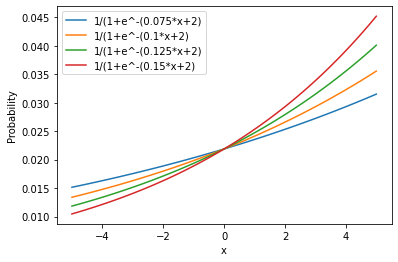

In [523]:
for i in [0.075, 0.1,0.125, 0.15]:
    # 100 linearly spaced numbers
    _x = np.linspace(-5,5,100)
    y = probability(-3.8, i, _x)
    
    plt.plot(x,y, label=f'1/(1+e^-({i}*x+2)')
    plt.legend(); #show legend
    plt.xlabel('x')
    plt.ylabel('Probability')

In [51]:
x=1*2+1

In [52]:
1 / (1 + np.exp(-x))

0.9525741268224334

In [121]:
_x = []
x = [15,21,23,50, 
                 35, 
                 37, 
                 55, 
                 66, 
                 84,
                 102]

for i in [15,21,23,50, 
                 35, 
                 37, 
                 55, 
                 66, 
                 84,
                 102]:
    cal=-3.8+0.1*i
    outcome = 1 / (1 + np.exp(-cal))
    _x.append(outcome)

In [122]:
_x

[0.09112296101485616,
 0.15446526508353475,
 0.1824255238063564,
 0.7685247834990178,
 0.4255574831883411,
 0.4750208125210601,
 0.8455347349164652,
 0.9426758241011313,
 0.9900481981330957,
 0.9983411989198255]

(0.0, 110.0)

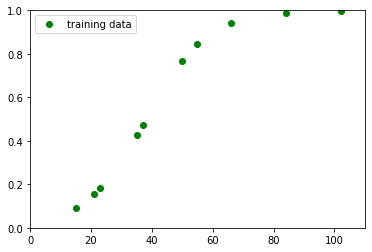

In [123]:
fig, ax = plt.subplots() #define the graph
ax.plot(x, _x, 'o', color='g', label='training data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## 1.3 x - 2 

In [127]:
theta = 1.3
intercept = -2

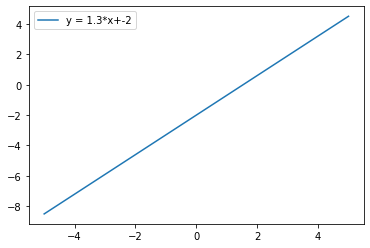

In [131]:
# linear regression

x = np.linspace(-5,5,100)   
y = theta*x-2
   
plt.plot(x,y, label=f'y = {theta}*x+{intercept}')
plt.legend(); #show legend

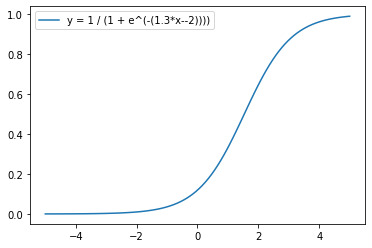

In [135]:
# logistic regression

x = np.linspace(-5,5,100)
y = sigmoid(np.dot(x, theta) - 2)

plt.plot(x,y, label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend

## -2x + 9

In [143]:
theta = -0.5
intercept = 9

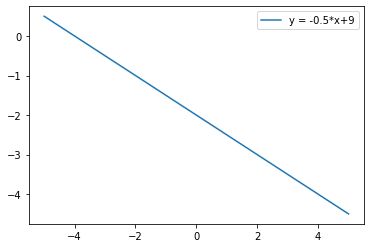

In [144]:
# linear regression

x = np.linspace(-5,5,100)   
y = theta*x-2
   
plt.plot(x,y, label=f'y = {theta}*x+{intercept}')
plt.legend(); #show legend

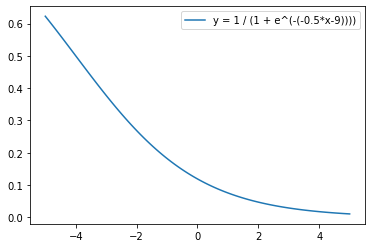

In [149]:
# logistic regression

x = np.linspace(-5,5,100)
y = sigmoid(np.dot(x, theta) - 2)

plt.plot(x,y, label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend

# start

In [44]:
# Create a hypothetical dataset from the MLS book
data = {'m_sq': [15, 
                 21,
                 23,
                 50, 
                 35, 
                 37, 
                 55, 
                 66, 
                 84,
                 102], 
        'property': ['Studio', 
                     'Studio', 
                     'Studio', 
                     'Studio', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment',
                     'Apartment', 
                     'Apartment',
                     'Apartment']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df


,m_sq,property
0,15,Studio
1,21,Studio
2,23,Studio
3,50,Studio
4,35,Apartment
5,37,Apartment
6,55,Apartment
7,66,Apartment
8,84,Apartment
9,102,Apartment


In [45]:
x = df.m_sq.values
y = df.property

(0.0, 110.0)

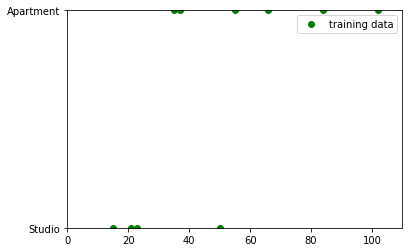

In [46]:
fig, ax = plt.subplots() #define the graph
ax.plot(x, y, 'o', color='g', label='training data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## Plot the linear regression

> First, let's turn a target variable `y=[Apartment, Studio]`  into numerical format `y=[1,0]`.

In [101]:
# Turn categorical target variable into numerical 
# 0 - Not Apartment
# 1 - Apartment

# Let's do it manually

for i in range(len(df)): 
    if y[i] == 'Apartment':
        y[i] = 1
    else: y[i] = 0


In [97]:
reg.coef_[0]

0.011783038985182346

## Plot Logistic Regression

For Linear Regression, we had the hypothesis y_hat = w.X +b , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is: 

y_hat = sigmoid(w.X + b) 

, whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$\hat{y}=\frac{1}{1+e^{-(\theta_1*x+\theta_0)}}$

In [317]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [154]:
# logistic regression

z = reg.intercept_ + reg.coef_[0]*x
y = sigmoid(z)



plt.plot(x, y, 'o', label='data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(15, 85) #length of x-axis

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [ ]:
# logistic regression

z = reg.intercept_ + reg.coef_[0]*x
y = sigmoid(z)



plt.plot(x, y, 'o', label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(15, 85) #length of x-axis

In [77]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf.fit(x, y)


In [78]:
x=df.m_sq.values.reshape((-1, 1))
y=[0,0,0,0,1,1,1,1,1,1]

In [80]:
clf.fit(x, y)


LogisticRegression()

In [85]:
clf.coef_

array([[0.10343942]])

In [64]:
-3.82295799+0.10343942x

0     15
1     21
2     23
3     50
4     35
5     37
6     55
7     66
8     84
9    102
Name: m_sq, dtype: int64